In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv('./data/history_data.csv')

# Drop non-numeric columns (e.g., DateTime)
data = data.select_dtypes(include=[np.number])

# Fill missing values in numeric columns with the mean
data.fillna(data.mean(), inplace=True)

# List of pollutants
pollutants = ['PM10', 'PM2.5', 'CO', 'SO2', 'NO2', 'O3']

# Dictionary to store scaled data for each pollutant
scalers = {}
scaled_data = {}

# Scale the data for each pollutant individually
for pollutant in pollutants:
    scaler = MinMaxScaler()
    scaled_data[pollutant] = scaler.fit_transform(data[[pollutant]])
    scalers[pollutant] = scaler  # Save the scaler for inverse transform later

# Display scaled data for PM10
pd.DataFrame(scaled_data['PM10'], columns=['PM10']).head()


,PM10
0,0.954820
1,0.954847
2,0.956666
3,0.951612
4,0.943323


In [19]:
# Function to create an LSTM model for single-time-step input
def create_single_time_step_model():
    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))  # Single feature input
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8))  # Predicting the next 8 hours
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create models for each pollutant
models = {}
for pollutant in pollutants:
    models[pollutant] = create_single_time_step_model()
    models[pollutant].summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472 (9.66 KB)

 Trainable params: 2,472 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472 (9.66 KB)

 Trainable params: 2,472 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472 (9.66 KB)

 Trainable params: 2,472 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472 (9.66 KB)

 Trainable params: 2,472 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472 (9.66 KB)

 Trainable params: 2,472 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472 (9.66 KB)

 Trainable params: 2,472 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train and test data storage
train_test_data = {}

# Split the data into training and testing sets for each pollutant
for pollutant in pollutants:
    X = scaled_data[pollutant][:-1]  # Remove the last row
    y = scaled_data[pollutant][1:]   # Shifted by one step to predict the next step
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_test_data[pollutant] = (X_train, X_test, y_train, y_test)

# Check the shape of PM10's training and test sets to ensure consistency
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_data['PM10']
print(X_train_pm10.shape, y_train_pm10.shape, X_test_pm10.shape, y_test_pm10.shape)


(26126, 1) (26126, 1) (6532, 1) (6532, 1)


In [21]:
# Train the models
history = {}
for pollutant in pollutants:
    X_train, X_test, y_train, y_test = train_test_data[pollutant]
    history[pollutant] = models[pollutant].fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.2424 - val_loss: 1.9082e-05
Epoch 2/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.4179e-04 - val_loss: 1.9054e-05
Epoch 3/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.0487e-04 - val_loss: 1.9004e-05
Epoch 4/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 4.4847e-05 - val_loss: 1.8987e-05
Epoch 5/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.0912e-04 - val_loss: 1.9287e-05
Epoch 6/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 5.1938e-05 - val_loss: 1.9036e-05
Epoch 7/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0219e-04 - val_loss: 1.9870e-05
Epoch 8/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 5.6801e-05 - val_loss: 1.9080e-05
Epoch 9/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 4.8185e-05 - val_loss: 1.9869e-05
Epoch 10/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 3.0780e-05 - val_loss: 1.8417e-05
Epoch 11/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s

In [22]:
# Function to predict the next 8 hours based on a single current value
def predict_next_8_hours_single_value(model, scaler, current_value):
    # Scale the current value
    current_value_scaled = scaler.transform([[current_value]])

    # Predict the next 8 hours
    predicted_values = model.predict(current_value_scaled)

    # Inverse transform the predicted values back to the original scale
    predicted_values = scaler.inverse_transform(predicted_values)

    return predicted_values[0]

# Example current values for each pollutant
current_values = {
    "PM10": 39.37,
    "PM2.5": 33.67,
    "SO2": 2.38,
    "NO2": 6.25,
    "CO": 13.35,
    "O3": 0.10,
}

# Make predictions for the next 8 hours for each pollutant
predictions = {}
for pollutant in pollutants:
    predictions[pollutant] = predict_next_8_hours_single_value(models[pollutant], scalers[pollutant], current_values[pollutant])

# Display predictions
for pollutant in pollutants:
    print(f"Predicted {pollutant} values for the next 8 hours: {predictions[pollutant]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted PM10 values for the next 8 hours: [73.88521  73.84148  74.998116 73.11694  75.20242  68.24755  76.99809
 77.817924]
Predicted PM2.5 values for the next 8 hours: [28.100616 27.101511 26.806839 28.06841  27.792929 26.249424 27.474485
 26.808723]
Predicted CO values for the next 8 hours: [252.39084 266.542   262.98737 255.12114 240.92303 240.22617 267.68707
 246.46713]
Predicted SO2 values for the next 8 hours: [3.500602  3.5770547 4.3361583 4.131255  4.2175198 4.2312574 4.6112995
 4.293393 ]
Predicted NO2 values for the next 8 hours: [17.076925 15.024061 16.944563 17.330011 18.361958 17.236866 16.743565
 17.460535]
Predicted O3 values for the next 8 hours: [16.478785   3.3943858  9.6477995 12.748892   2.661854   5.244925
  7.4514847 14.41822  ]


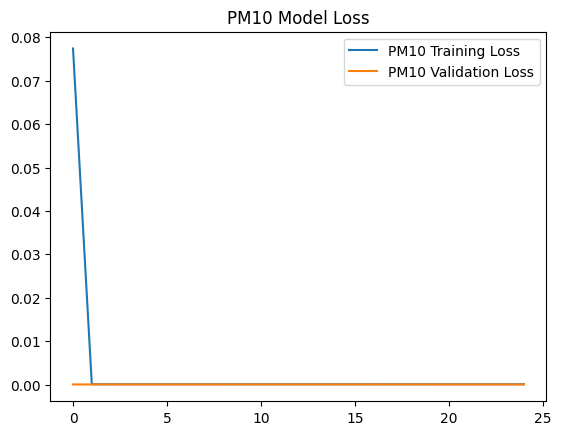

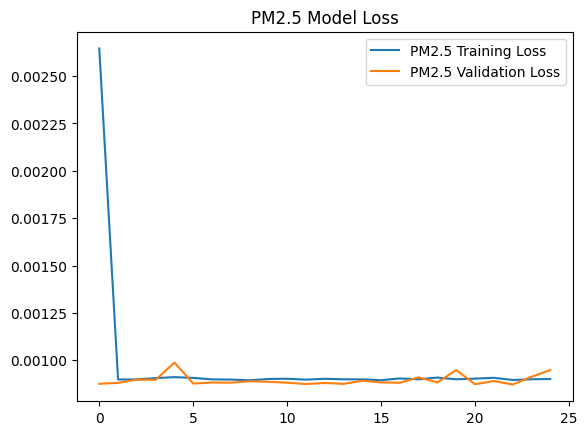

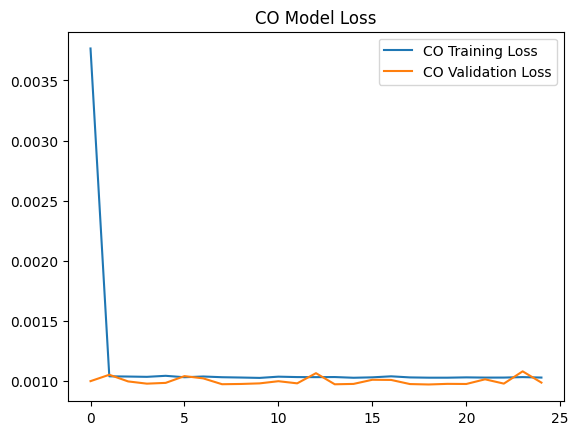

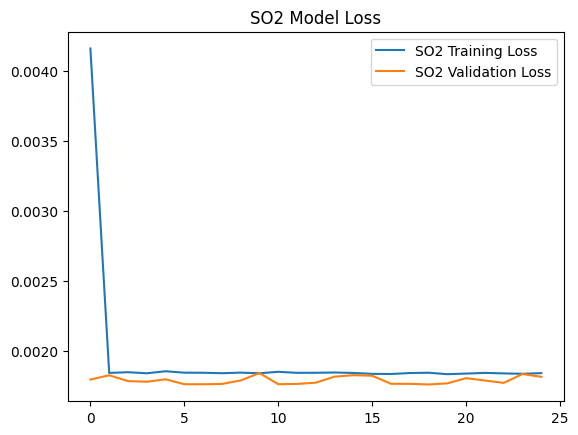

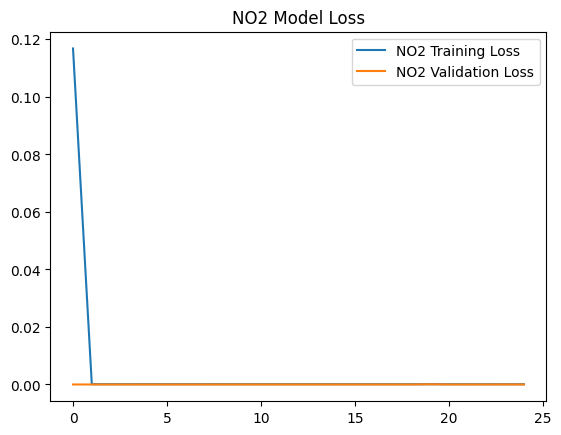

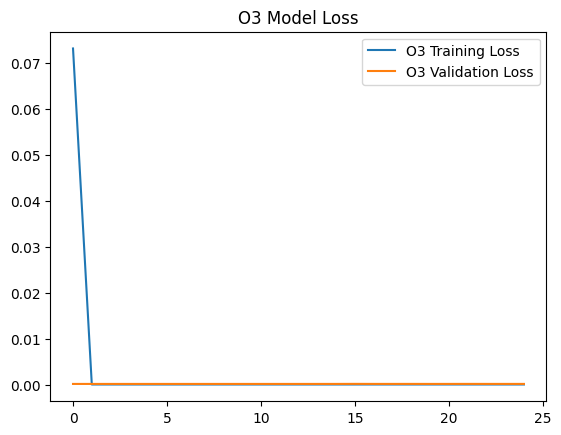

In [23]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for each pollutant model
for pollutant in pollutants:
    plt.plot(history[pollutant].history['loss'], label=f'{pollutant} Training Loss')
    plt.plot(history[pollutant].history['val_loss'], label=f'{pollutant} Validation Loss')
    plt.title(f'{pollutant} Model Loss')
    plt.legend()
    plt.show()